In [51]:
%pylab nbagg
%matplotlib inline
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


 (1) Integrate the test particle for 10 orbital times,
using first a tilmestep equal to 1/10 of the orbital time. Graph the orbit in the
(x,y) plane. Is the orbit a circle? Graph also, as a function of time, the evolution of
the z-component of the angular momentum and the energy of the orbit. Are these
conserved? Which integrator performs best? Discuss. 

 (a) the Euler method, where
xn=xn-1+vn-1*dt; vn=vn-1+an-1*dt; tn=tn-1+dt

 (b) a leap-frog integrator, where
accelerations and velocities are computed at staggered steps (xn=xn-1+vn+1/2*dt;
vn+1/2=vn-1/2+an*dt; tn=tn-1+dt; tn+1/2=tn+dt/2)

In [171]:
# Euler Integrator

x_plt = array([1]) # x values
y_plt = array([0]) # y values
vx_plt = array([0]) # x component of velocity
vy_plt = array([1])
t_plt = array([0]) # time 


x_old = 1 #xn-1
y_old = 0
vx = 0
vy = 1
t = 0 # set starting time to 0
G=1 # Gravitational constant
M=1 # Mass
dt = .1*2*pi 
t_f = 10*2*pi

while (t < t_f):
    
    x = x_old + vx*dt        #  Euler step
    y = y_old + vy*dt
    r = sqrt(x**2 + y**2)
    vx = vx - dt*(G*M*x)/r**3
    vy = vy - dt*(G*M*y)/r**3
    
    x_plt = append(x_plt,x)   
    y_plt = append(y_plt,y)
    vx_plt = append(vx_plt,vx)
    vy_plt = append(vy_plt,vy)
    t_plt = append(t_plt,t)
    
    x_old = x    # Update x_old and y_old for next Euler step
    y_old = y
    t = t + dt

Text(0.5, 1.0, 'Euler Method for time steps: 0.1, vc=1')

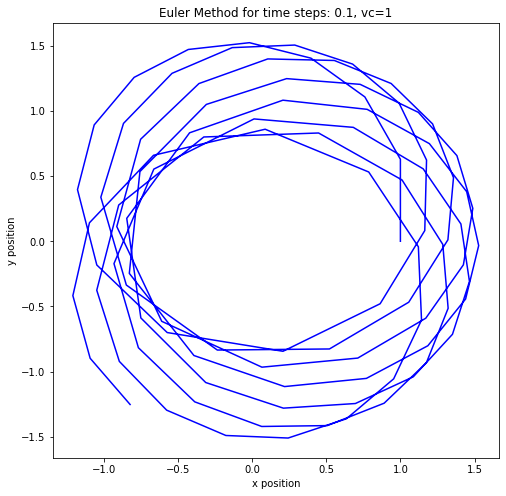

In [172]:
plt.figure(figsize=(8,8))
plot(x_plt,y_plt,'b-')
xlabel('x position')
ylabel('y position')
title('Euler Method for time steps: 0.1, vc=1')

The orbit is circular--with the chosen time step, the orbit looks rather jagged, suggesting precession. 

(-2, 2)

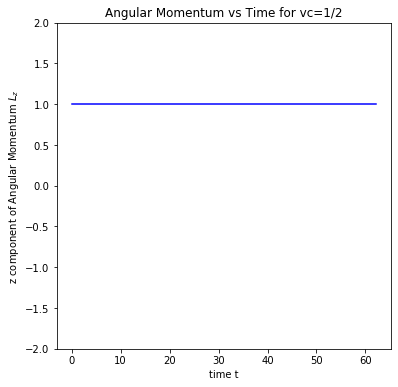

In [173]:
plt.figure(figsize=(6,6))
Lz = x_plt*vy_plt-y_plt*vx_plt #angular momemt
plot(t_plt,Lz,'b-')
xlabel('time t')
ylabel('z component of Angular Momentum $L_z$')
title('Angular Momentum vs Time for vc=1/2')
ylim(-2,2)

The z-component of angular momentum does not change over time, thus it can be inferred that the quantity is conserved in time. This agrees with expectations as in spherical systems, the force is directed inwards, thus angular momentum is conserved. 

In [174]:
E = 0.5*((vx_plt)**2+(vy_plt)**2)-(1/sqrt((x_plt)**2+(y_plt)**2))

Text(0.5, 0, 't')

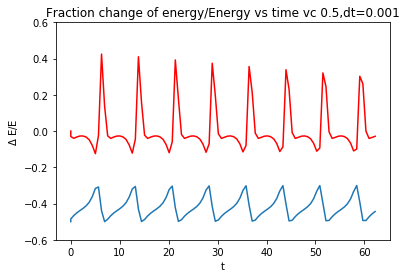

In [175]:
ET = []
for n in range(len(E)):
    if n == 0:
        init = E[n]
        ET.append(0)
    else:
        ET.append((E[n]-init)/init)
        init = E[n]
        
plot(t_plt,E)
plot(t_plt,ET,"r")
ylim(-0.6,0.6)
title('Fraction change of energy/Energy vs time vc 0.5,dt=0.001')
ylabel('$\Delta$ E/E')
xlabel('t')


Text(0.5, 1.0, '$\\Delta$ E/E 0.001 timesteps, vc=0.5')

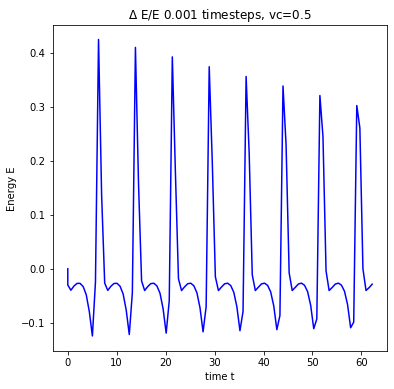

In [176]:
plt.figure(figsize=(6,6))
#plot(t_plt,E)
plot(t_plt,ET,'b-')
xlabel('time t')
ylabel('Energy E')
title('$\Delta$ E/E 0.001 timesteps, vc=0.5')


Energy behaves in an oscillatory motion *

small percentage in the change of energy indicates that energy is conserved

In [178]:
# Leap Frog Integrator


xl_plt = array([1])
yl_plt = array([0])
vxl_plt = array([0])
vyl_plt = array([1])
tl_plt = array([0])

## Execute Leapfrog method

dt= .1*2*pi
tf=10*2*pi
xl = 1
yl = 0
vxl = 0
vyl = 1
tl = 0# set starting time to 0


while (tl <= tf):
    
    vxl_dash= vxl - 0.5*dt*(1*1*xl)/(sqrt(xl**2 + yl**2)**3)
    vyl_dash= vyl - 0.5*dt*(1*1*yl)/(sqrt(xl**2 + yl**2)**3)
    Xl= xl + vxl_dash*dt
    Yl= yl + vyl_dash*dt
    Vxl=vxl_dash - 0.5*dt*(1*1*Xl)/(sqrt(Xl**2 + Yl**2)**3)
    Vyl=vyl_dash - 0.5*dt*(1*1*Yl)/(sqrt(Xl**2 + Yl**2)**3)
    
    xl_plt = append(xl_plt,Xl)   # Append new points to the arrays
    yl_plt = append(yl_plt,Yl)
    vxl_plt = append(vxl_plt,Vxl)
    vyl_plt = append(vyl_plt,Vyl)
    tl_plt = append(tl_plt,tl)
    
    xl=Xl #update elements
    yl=Yl
    vxl=Vxl
    vyl=Vyl
    tl = tl + dt  # Increment time

Text(0.5, 1.0, 'Leap Frog Method for time steps of 0.01')

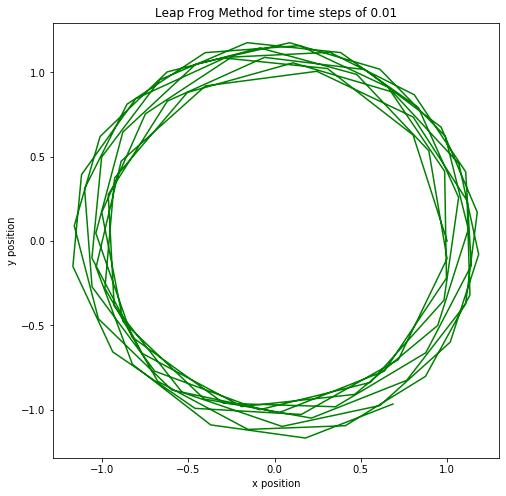

In [179]:
plt.figure(figsize=(8,8))
plot(xl_plt,yl_plt, 'g-')
xlabel('x position')
ylabel('y position')
title('Leap Frog Method for time steps of 0.01')

(-2, 2)

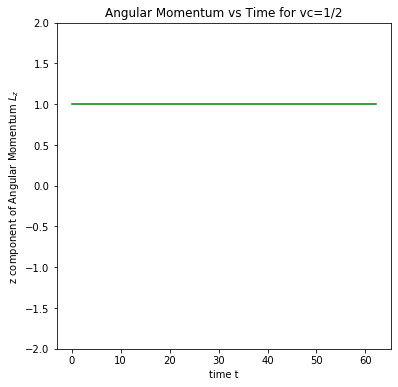

In [180]:
plt.figure(figsize=(6,6))
Llz = xl_plt*vyl_plt-yl_plt*vxl_plt #angular momemt
plot(tl_plt,Llz,'g-')
xlabel('time t')
ylabel('z component of Angular Momentum $L_z$')
title('Angular Momentum vs Time for vc=1/2')
ylim(-2,2)

In [181]:
El = 0.5*((vxl_plt)**2+(vyl_plt)**2)-(1/sqrt((xl_plt)**2+(yl_plt)**2))

Text(0.5, 1.0, 'Leap frog Method - Energy plot for timesteps of 0.1, vc=0.5')

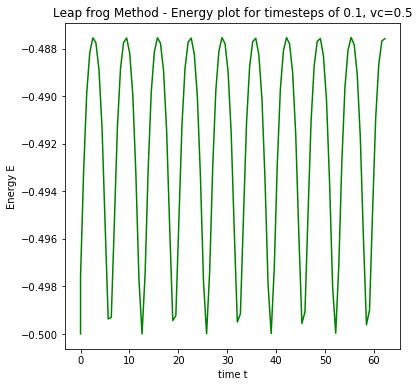

In [182]:
plt.figure(figsize=(6,6))
#plot(t_plt,E)
plot(tl_plt,El,'g-')
xlabel('time t')
ylabel('Energy E')
title('Leap frog Method - Energy plot for timesteps of 0.1, vc=0.5')